In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

# TAREA 

In [216]:
# Importar datos de data.csv
import pandas as pd

data = pd.read_csv('data.csv')
frequency = 1 / 24

In [217]:
#Pregunta 2
df['Temperatura (C)'] = df['Temperatura (C)'].interpolate()

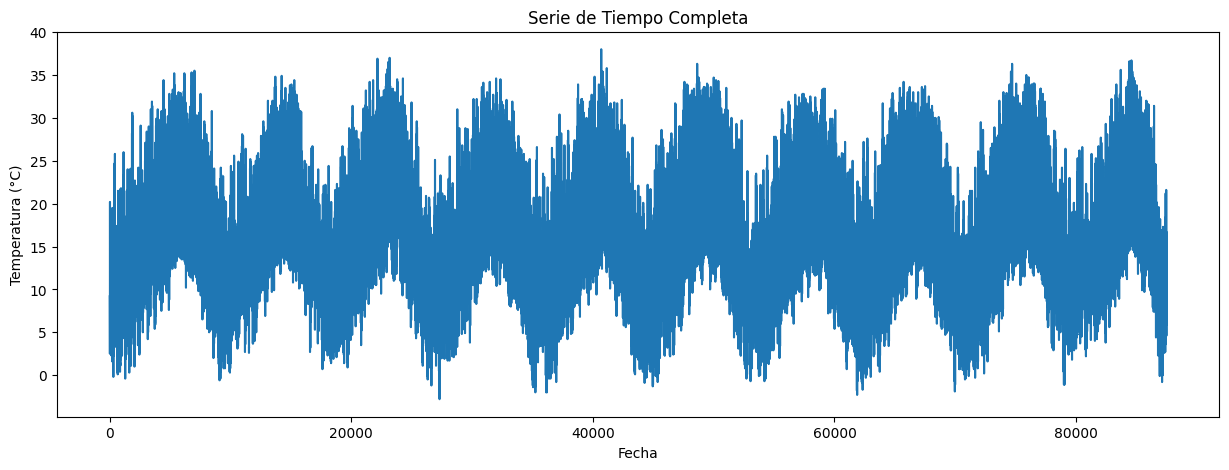

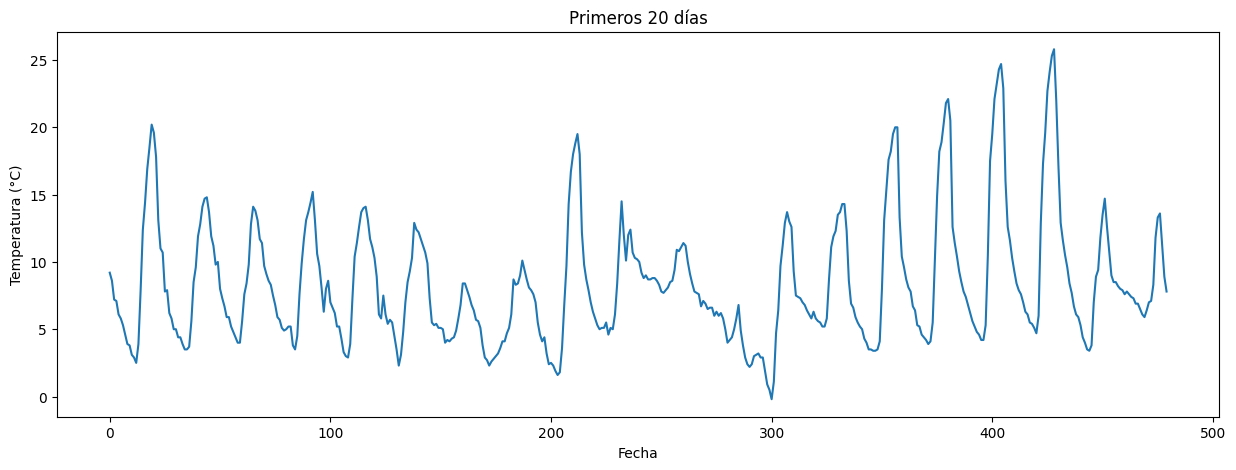

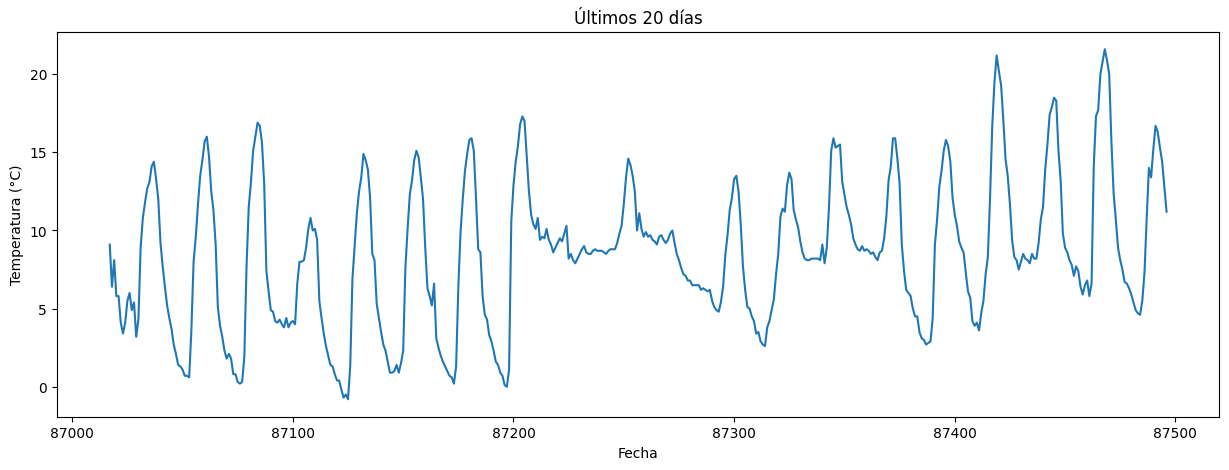

In [218]:
#Pregunta 3
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Temperatura (C)'])
plt.title('Serie de Tiempo Completa')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

#primeros 20 dias
plt.figure(figsize=(15, 5))
plt.plot(df.index[:20*24], df['Temperatura (C)'][:20*24])
plt.title('Primeros 20 días')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

#últimos 20 días
plt.figure(figsize=(15, 5))
plt.plot(df.index[-20*24:], df['Temperatura (C)'][-20*24:])
plt.title('Últimos 20 días')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

In [219]:
#Pregunta 4
temperature_data = df['Temperatura (C)'].values
# temperature = 20 + 10 * np.cos(2*np.pi * frequency * np.arange(len(temperature_data))) + np.random.normal(0, 1, len(temperature_data))
temperature = temperature_data
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(len(temperature), 1)

In [220]:
temperature_fft_scaled = np.abs(temperature_fft) / (len(temperature_data)/2) # escalar la amplitud de cada frecuencia
freqs_fft_day = freqs_fft * 24 # escalar frecuencias de horas a días

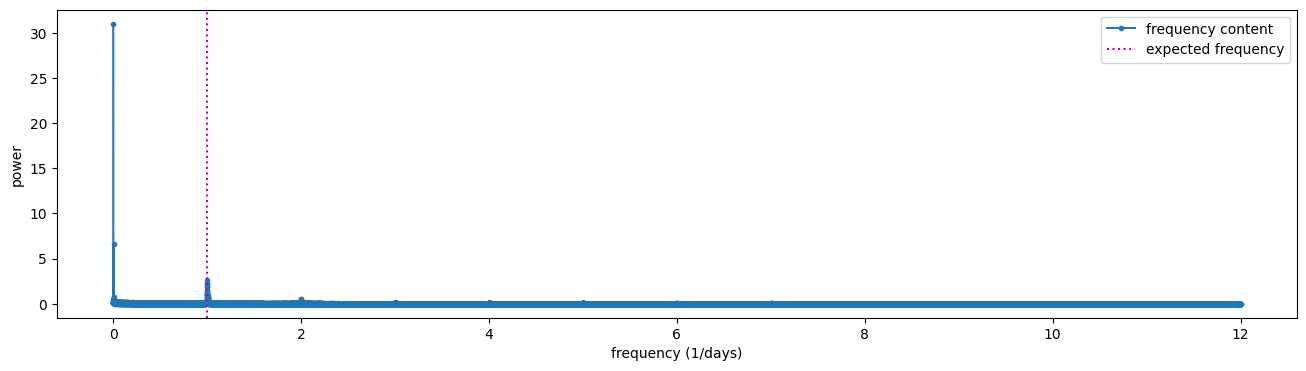

In [221]:
#pregunta 5
fig = plt.figure(figsize=(16,4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='m', linestyle=':', label='expected frequency')

plt.xlabel('frequency (1/days)')
plt.ylabel('power')
plt.legend()

plt.show()


C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_7376\1912304898.py:2: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / freqs_fft_day


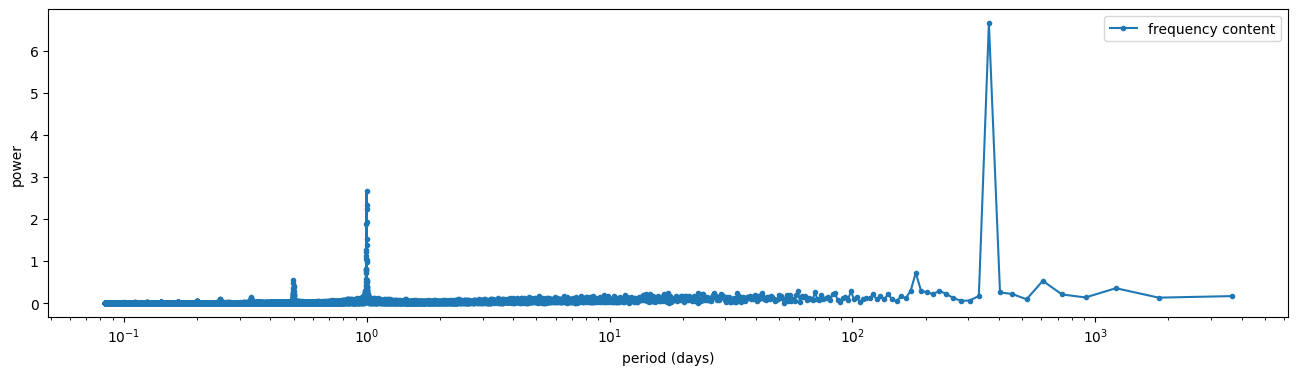

In [222]:
#pregunta 6 
periods = 1 / freqs_fft_day

fig = plt.figure(figsize=(16,4))

plt.plot(periods, temperature_fft_scaled, marker='.', label='frequency content')
plt.xlabel('period (days)')
plt.ylabel('power')
plt.xscale('log')
# plt.yscale('log')
plt.legend()



In [223]:
#7
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

for p in list(peaks):
    print("Amplitude at frequency of " + str(freqs_fft_day[p]) + " per day is " + str(temperature_fft_scaled[p]) + " degrees Celsius.")


Amplitude at frequency of 0.002742951186897836 per day is 6.6638770010320245 degrees Celsius.
Amplitude at frequency of 0.9989828222681919 per day is 1.519707421732447 degrees Celsius.
Amplitude at frequency of 1.0000800027429513 per day is 2.3283954955839317 degrees Celsius.
Amplitude at frequency of 1.0011771832177103 per day is 2.668836629811897 degrees Celsius.
Amplitude at frequency of 1.0022743636924694 per day is 1.263388681374878 degrees Celsius.


### 8

- a) La temperatura promedio está representada por la componente de frecuencia cero (DC component) en los resultados de RFFT.
- b) Las oscilaciones anuales se detectan buscando picos en la RFFT con un periodo cercano a 365 días.
- c) Esta diferencia puede estimarse observando la amplitud del pico con un periodo anual (aproximadamente 365 días).
- d) Las oscilaciones diarias se detectan buscando picos en la RFFT con un periodo de aproximadamente 1 día.
- e) Esta diferencia puede estimarse observando la amplitud del pico con un periodo diario (aproximadamente 1 día).